<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Presentado por Joan Mauricio Yanza Ruiz

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


1)Muestre que la expresión que permite resolver el problema:

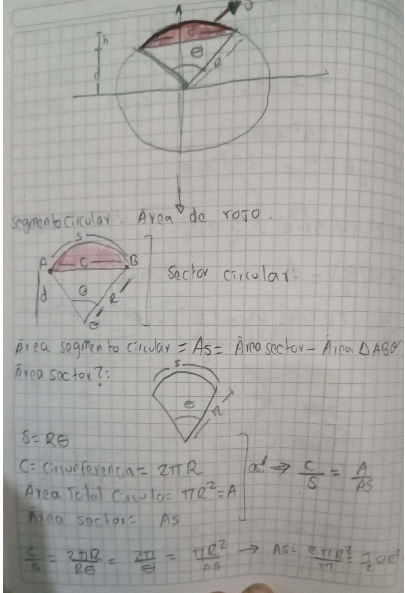

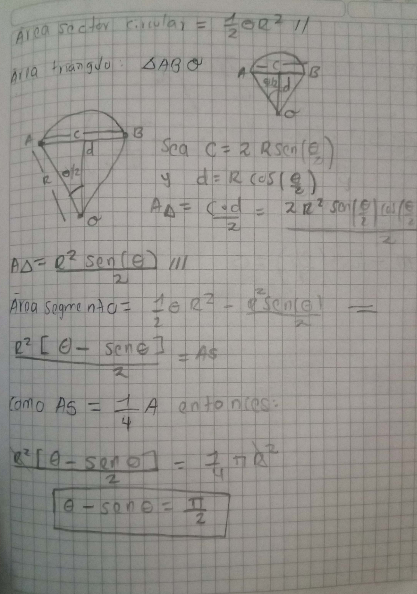

1) ¿Construya una grafica para theta?, Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

In [ ]:
# funcion

f = lambda theta: theta - np.sin(theta) - (np.pi/2)


# los valores de theta en radianes
theta = np.linspace(0,360,360)
theta = theta * np.pi / 180

# valores de la funcion
y = f(theta)


In [ ]:
# se tabula los valores de theta y la funcion
df = pd.DataFrame()
df["Valores de theta en grados"] = theta * 180 / np.pi
df["Valores de theta en radianes"]= theta
df["Valores de la funcion"] = y



In [ ]:
x =np.linspace(0,6,14)

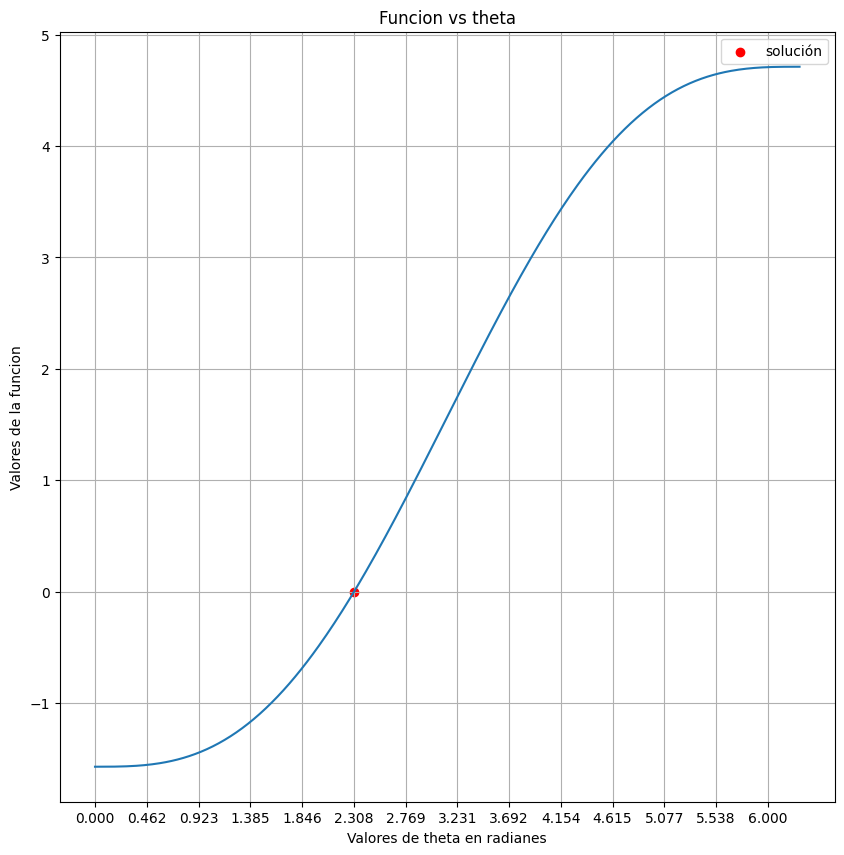

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df["Valores de theta en radianes"],df["Valores de la funcion"])
plt.scatter(2.308,0, label="solución", color="r")
plt.grid()
plt.xlabel("Valores de theta en radianes")
plt.ylabel("Valores de la funcion")
plt.xticks(x)
plt.legend()
plt.title("Funcion vs theta")
plt.show();


En la anteror grafica se observa que la solución esta alrededor o cerca del punto correspondiente a 2.308 radianes en el eje horizontal

Emplee el metodo de biseccion, punto fijo, newton y secante para comprobar la solución intuida del apartado anterior.

In [ ]:
#Metodo de biseccion

b = optimize.bisect(f,1,3)
print(f"La solucion obtenida con el metodo de biseccion es {b}")

La solucion obtenida con el metodo de biseccion es 2.309881460010729


In [ ]:
#Metodo de newton
#defino la derivada de la funcion f
d = lambda theta: 1 -np.cos(theta)

n = optimize.newton(f,3,d)
print(f"La solucion obtenida con el metodo de newton es {n}")

La solucion obtenida con el metodo de newton es 2.309881460010057


In [ ]:
# Metodo de la secante

s = optimize.newton(f,3)
print(f"La solucion obtenida con el metodo de la secante es {s}")

La solucion obtenida con el metodo de la secante es 2.309881460010057


In [ ]:
# metodo del punto fijo
g = lambda theta: theta - f(theta)
p = optimize.fixed_point(g,4)
p
print(f"La solucion obtenida con el metodo del punto fijo  es {p}")

La solucion obtenida con el metodo del punto fijo  es 2.3098814600100575


2)An object falling vertically through the air is subjected to viscous resistance as well as to the force of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the object after t seconds is

Emplee el metodo de biseccion, punto fijo, newton y secante para comprobrar la solución.

In [ ]:
# Primero defino una funcion

def altura(t):
  s0 = 300
  m = 0.25
  k = 0.1
  termino_1 = (m* (32.17) / k) * t
  termino_2 = ((m ** 2) * (32.17)/ k ) * t
  termino_3 = (np.exp( (-k * t) / m))
  s = s0 - termino_1 + termino_2 * (1-termino_3)
  return s

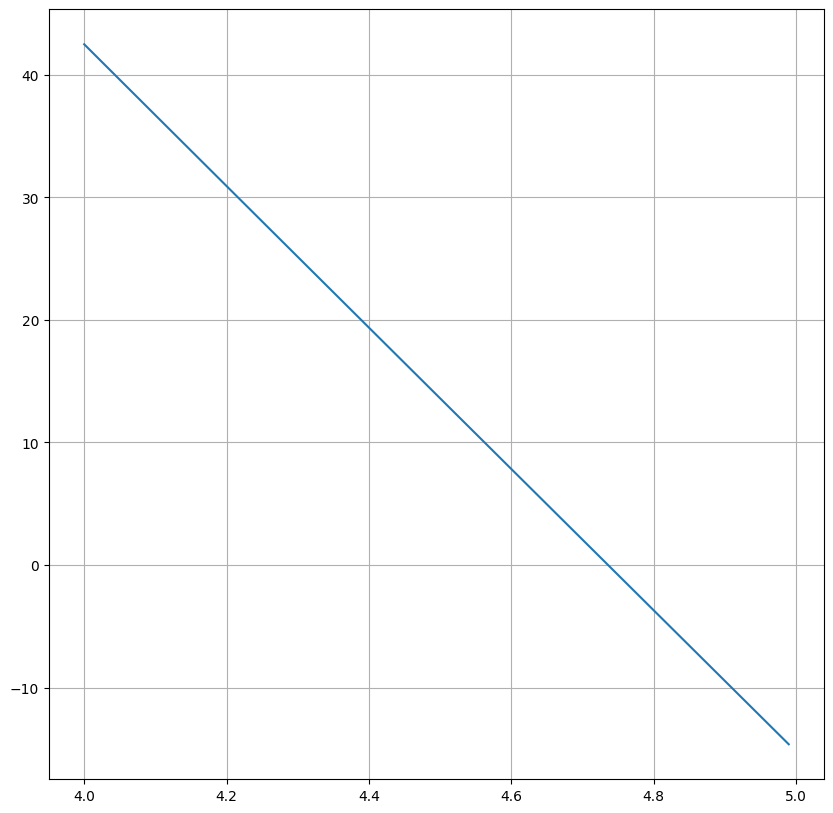

In [ ]:
# hago la grafica para ver los valores
t = np.arange(4,5,0.01)

s= altura(t)

plt.figure(figsize=(10,10))
plt.plot(t,s)
plt.grid()
plt.show();


In [ ]:
#metodo de biseccion
t_b  = optimize.bisect(altura,4.6,4.8,xtol=0.01)
print(f"El tiempo que le toma al objeto en golpear el suelo obtenido con metodo de biseccion es ", round(t_b,2), "segundos")

El tiempo que le toma al objeto en golpear el suelo obtenido con metodo de biseccion es  4.73 segundos


In [ ]:
import sympy as sp


In [ ]:
# metodo de la secante

m = optimize.newton(altura,5,tol=0.01)
print("El tiempo de caida obtenido con el metodo secante es ", round(m,2), " segundos")

El tiempo de caida obtenido con el metodo secante es  4.74  segundos


In [ ]:
#metodo de newton
# defino una funcion con t para aplicar derivada con sp.diff
t= sp.Symbol("t")

y = 300 - (0.25 * (32.17) / 0.1) *t + ((0.25 ** 2) * (32.17)/ 0.1 ) * t * (1- (sp.exp( (-0.1 * t) / 0.25)))

dy_dx = sp.diff(y, t)

# esta es  la derivada de la funcion
dy_dx

8.0425*t*exp(-0.4*t) - 60.31875 - 20.10625*exp(-0.4*t)

In [ ]:
# convierto la derivada en una funcion lambda
f_dy_dx = sp.lambdify(t, dy_dx)

# aplico optimize
n = optimize.newton(altura,5,f_dy_dx, tol=0.01)
print("El tiempo de caida obtenido con el metodo de newton  es ", round(n,2), " segundos")

El tiempo de caida obtenido con el metodo de newton  es  4.74  segundos


In [ ]:
# metodo del punto fijo

def altura(t):
    s0 = 300
    m = 0.25
    k = 0.1
    termino_1 = (m * (32.17) / k) * t
    termino_2 = ((m ** 2) * (32.17) / k) * t
    termino_3 = (np.exp((-k * t) / m))
    s = s0 - termino_1 + termino_2 * (1 - termino_3)
    return s

t = np.arange(4, 5, 0.01)

h= lambda t: t- altura(t)

p_F= float(optimize.fixed_point(h,5,xtol=0.01))

print("El tiempo de caida obtenido con el metodo del punto fijo  es ", round(p_F,2), " segundos")

El tiempo de caida obtenido con el metodo del punto fijo  es  4.74  segundos


3)Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

In [ ]:
funcion_m = lambda m : m - np.tanh(m/0.5)

m=np.linspace(-2,2,10)

y=funcion_m(m)

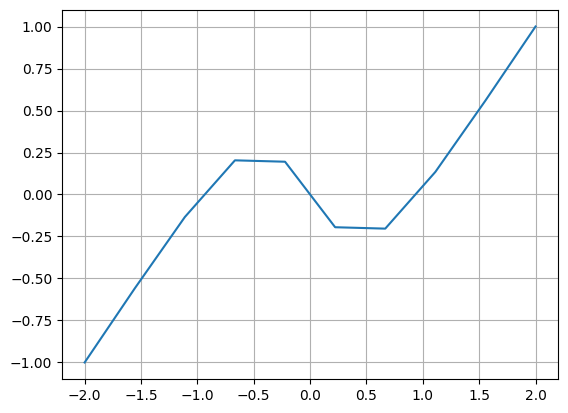

In [ ]:
plt.plot(m,y)
plt.grid()
plt.show();

In [ ]:
s1 = optimize.newton(funcion_m,-0.5)
s2 = optimize.newton(funcion_m,1.5)
s3 = optimize.newton(funcion_m,0.01, tol=1e-6)
print("Para t=0.5 la magnetizacion reducida es ", round(s1,4), "o puede valer ",round(s2,4), "o puede valer",int(round(s3,4)))

Para t=0.5 la magnetizacion reducida es  -0.9575 o puede valer  0.9575 o puede valer 0


b. Valide su respuestado con el metodo de punto fijo. (Muestre su resultado con 4 cifras)

In [ ]:
nueva_funcion = lambda m: m- funcion_m(m)

# para un punto cercano a 1
p1 = optimize.fixed_point(nueva_funcion,1,xtol=1e-6)

# para un punto cercano a 0
p0 = optimize.fixed_point(nueva_funcion,0.1,xtol=1e-6)

# para un punto cercano a -1
pn = optimize.fixed_point(nueva_funcion,-0.8,xtol=1e-6)

print("Para t=0.5 la magnetizacion reducida obtenida por metodo de punto fijo es:  ",np.round(p1,4), "o puede valer ",np.round(p2,4),"o puede valer",np.round(pn,4))
print("Se valida el resultado")

Para t=0.5 la magnetizacion reducida obtenida por metodo de punto fijo es:   0.9575 o puede valer  0.0 o puede valer -0.9575
Se valida el resultado


d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los 100 valores de T.

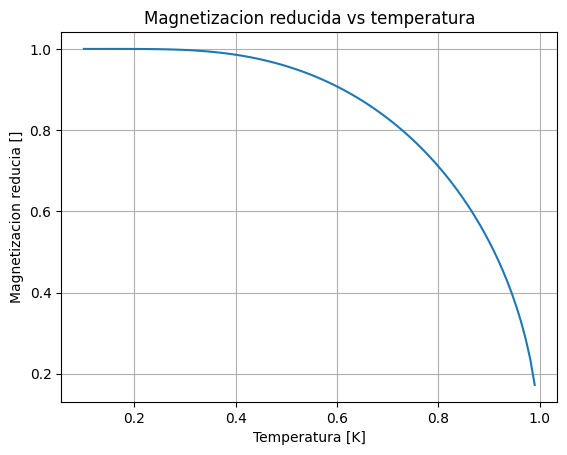

(None,)

In [ ]:
T = np.linspace(0.1,0.99,100)

def mag(m,T):
  f =  m - np.tanh(m/T)
  return f


M = np.zeros_like(T)
for i in range(len(T)):
  M[i] = optimize.newton(mag,1.5,args=(T[i],))

plt.plot(T,M)
plt.title("Magnetizacion reducida vs temperatura")
plt.xlabel("Temperatura [K]")
plt.ylabel("Magnetizacion reducia []")
plt.grid()
plt.show(),

5)Construir un fractal empleando el metodo de Newton-Raphson, (Reproducir código y entender)

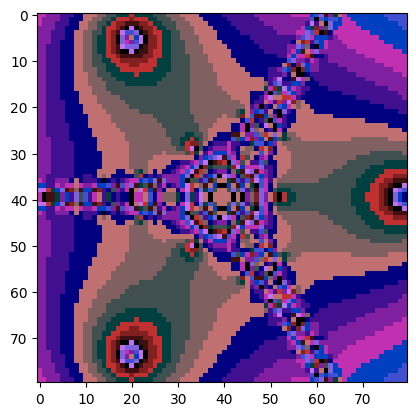

In [ ]:
# se importa librerias
import numpy as np
import matplotlib.pylab as plt

# se importa la clase "Image" del módulo "PIL" en Python. Con esto se trabaja en imagenes
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

# La clase Image tiene el método new(), que crea una nueva imagen.
#El primer argumento "RGB"  indica que la imagen tendrá tres canales de color: rojo (R), verde (G) y azul (B), con dimensiones 80x80
image = Image.new("RGB", (Npx_X, Npx_Y))

# arreglos de 0 a 80
npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

#limites entre  x y y
xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# zx y zy son dos arreglos que van desde -1 hasta 1, con esto se tiene un arreglo para el eje x y otro para el eje y

# Definicion  de una  funcion y la derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

# h es valor muy cercano a cero, fpn es una funcion que retorna la pendiente de una recta que es tangente a la funcion en z osea su derivada
h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1

# se itera en el arreglo de zx desde -1 hasta 1, dentro del bucle se itera en el arreglo zy desde -1 hasta
for zx_ in zx:
  # SE COMIENZA X CON un valor de cero y se incrementa de uno en uno hasta 79
  x = x + 1

  # se comienza con -1 hasta 79
  y = -1
  for zy_ in zy:
      y = y + 1
      #z_0 es un numero complejo con ´parte real zx_ y parte imaginaria zy_
      Z_0 = complex(zx_, zy_)

      # en cada iteracion se aplica el  metodo de Newton Raphson, la idea es encontrar la raiz en la funcion compleja
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps): # hay un margen de tolerancia o error de 1E-8 ,si se pasa el margen se detiene el ciclo
          break

        Z_0 = Z
      #print(i)
      #print(i)
      #Se calculan los valores de r, g y b basados en el número de iteraciones i, lo que determinará el color de cada píxel en la imagen resultante.
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      #Asigna el color especificado por (r,g,b) al píxel en la posición (x,y) en la imagen. Esto se repite para todos los píxeles en la imagen, generando así la representación visual de las raíces de la ecuación en el plano complejo.
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523

Este código genera una representación visual de las raíces de la ecuación
z^3−1=0 utilizando el método de Newton-Raphson en el plano complejo delimitado en el eje real entre -1 y 1  y en e eje imaginario entre -1 y 1